In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

### **Features**
- ID: Número de cliente
- target: 1 cuando no tuvo ningún atraso de más de 30 días en sus primeros 6 pagos, 0 sí tuvo al menos un atraso de más de 30 días en sus primeros 6 pagos
- CODE_GENDER: Género
- FLAG_OWN_CAR: si tiene coche
- FLAG_OWN_REALTY: si tiene una propiedad
- CNT_CHILDREN: Número de niños
- AMT_INCOME_TOTAL: total de ingresos anuales
- NAME_INCOME_TYPE: tipo de ingresos
- NAME_EDUCATION_TYPE: Nivel educativo
- NAME_FAMILY_STATUS: Estado civil
- NAME_HOUSING_TYPE: tipo de vivienda
- DAYS_BIRTH: Cumpleaños, cuenta hacia atrás desde el día actual (0), -1 significa ayer  
- DAYS_EMPLOYED: Fecha de inicio del empleo, cuenta hacia atrás desde el día actual (0). Si es positivo, significa que la persona está desempleada actualmente.
- FLAG_MOBIL: si tiene celular
- FLAG_WORK_PHONE: si tiene telefono de trabajo
- FLAG_PHONE: si tiene telefono
- FLAG_EMAIL: si tiene email
- OCCUPATION_TYPE: ocupación
- CNT_FAM_MEMBERS: tamaño de familia

In [42]:
def plot_categorical_by_target(df, variable):
    
    df_paid = df[df['target'] == 1]
    df_default = df[df['target'] == 0]
    
    paid_counts = df_paid[variable].value_counts(normalize=True) * 100  
    default_counts = df_default[variable].value_counts(normalize=True) * 100  

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True) 
    fig.suptitle(f'Distribución porcentual de {variable} por target', fontsize=16, weight='bold')

    sns.barplot(x=paid_counts.index, y=paid_counts.values, ax=axes[0], palette='Blues')
    axes[0].set_title('Clientes PAID (target=1)', fontsize=14)
    axes[0].set_xlabel(variable, fontsize=12)
    axes[0].set_ylabel('Porcentaje', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, linestyle='--', alpha=0.6)
    axes[0].set_ylim(0, 100)  

    sns.barplot(x=default_counts.index, y=default_counts.values, ax=axes[1], palette='Reds')
    axes[1].set_title('Clientes DEFAULT (target=0)', fontsize=14)
    axes[1].set_xlabel(variable, fontsize=12)
    axes[1].set_ylabel('Porcentaje', fontsize=12) 
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, linestyle='--', alpha=0.6)
    axes[1].set_ylim(0, 100) 

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [23]:
def plot_boxplot_by_target(df, variable):
    
    df_paid = df[df['target'] == 1]
    df_default = df[df['target'] == 0]
    
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)  # Ejes Y independientes
    fig.suptitle(f'Distribución de {variable} por target', fontsize=16, weight='bold')

    sns.boxplot(y=variable, data=df_paid, ax=axes[0], palette='Blues')
    axes[0].set_title('Clientes PAID (target=1)', fontsize=14)
    axes[0].set_ylabel(variable, fontsize=12)
    axes[0].grid(True, linestyle='--', alpha=0.6)

    sns.boxplot(y=variable, data=df_default, ax=axes[1], palette='Reds')
    axes[1].set_title('Clientes DEFAULT (target=0)', fontsize=14)
    axes[1].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [69]:
df = pd.read_csv('data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26129 entries, 0 to 26128
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   26129 non-null  int64  
 1   target               26129 non-null  int64  
 2   CODE_GENDER          26129 non-null  object 
 3   FLAG_OWN_CAR         26129 non-null  object 
 4   FLAG_OWN_REALTY      26129 non-null  object 
 5   CNT_CHILDREN         26129 non-null  int64  
 6   AMT_INCOME_TOTAL     26129 non-null  float64
 7   NAME_INCOME_TYPE     26129 non-null  object 
 8   NAME_EDUCATION_TYPE  26129 non-null  object 
 9   NAME_FAMILY_STATUS   26129 non-null  object 
 10  NAME_HOUSING_TYPE    26129 non-null  object 
 11  DAYS_BIRTH           26129 non-null  int64  
 12  DAYS_EMPLOYED        26129 non-null  int64  
 13  FLAG_MOBIL           26129 non-null  int64  
 14  FLAG_WORK_PHONE      26129 non-null  int64  
 15  FLAG_PHONE           26129 non-null 

In [3]:
df.head()

,ID,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008812,1,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
3,5008813,1,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
4,5008814,1,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


### DESCRIPTIVE

#### CODE_GENDER

In [4]:
df.CODE_GENDER.value_counts(normalize=True)

CODE_GENDER
F    0.671935
M    0.328065
Name: proportion, dtype: float64

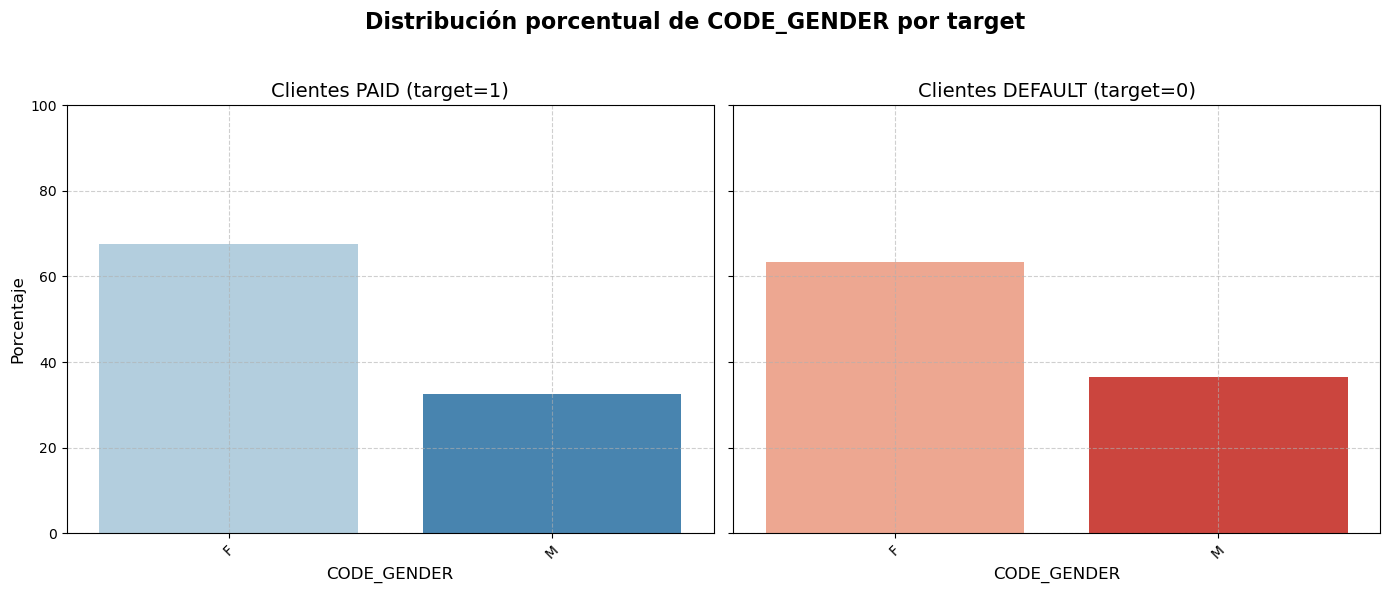

In [35]:
plot_categorical_by_target(df, 'CODE_GENDER')

#### FLAG_OWN_CAR, FLAG_OWN_REALTY

In [16]:
df.FLAG_OWN_CAR.value_counts(normalize=True)

FLAG_OWN_CAR
N    0.617858
Y    0.382142
Name: proportion, dtype: float64

In [17]:
df.FLAG_OWN_REALTY.value_counts(normalize=True)

FLAG_OWN_REALTY
Y    0.670137
N    0.329863
Name: proportion, dtype: float64

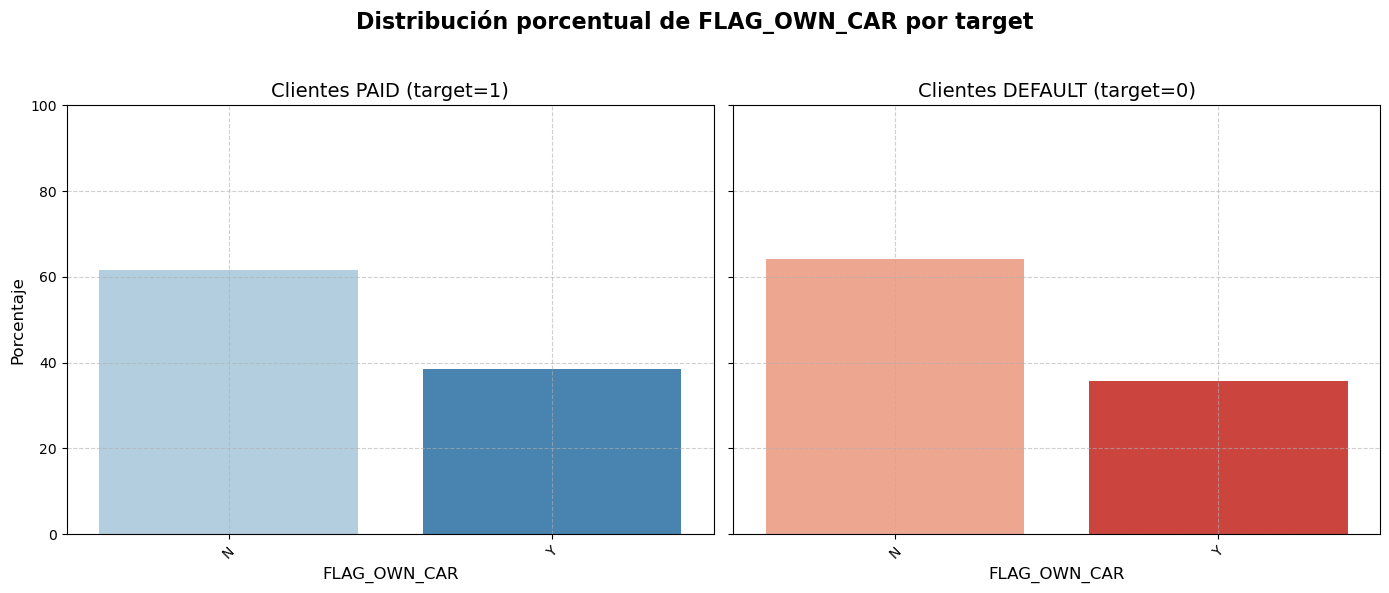

In [36]:
plot_categorical_by_target(df, 'FLAG_OWN_CAR')

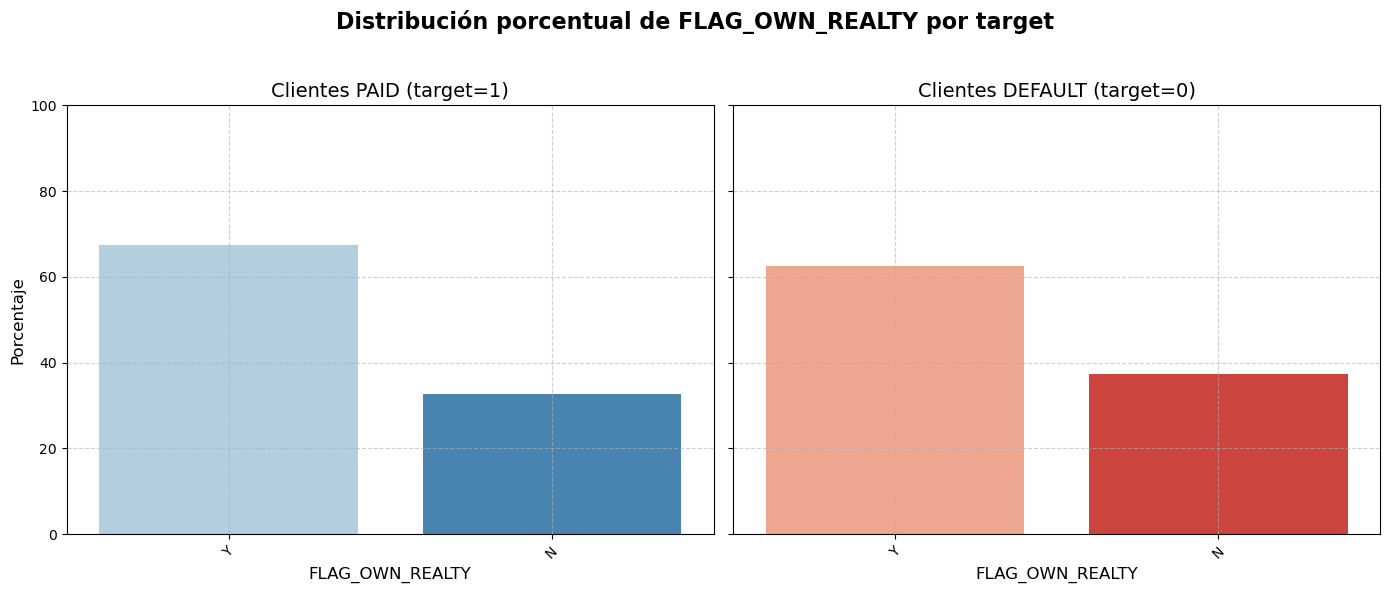

In [37]:
plot_categorical_by_target(df, 'FLAG_OWN_REALTY')

#### CNT_CHILDREN

In [20]:
df.CNT_CHILDREN.describe()

count    26129.000000
mean         0.435646
std          0.746907
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: CNT_CHILDREN, dtype: float64

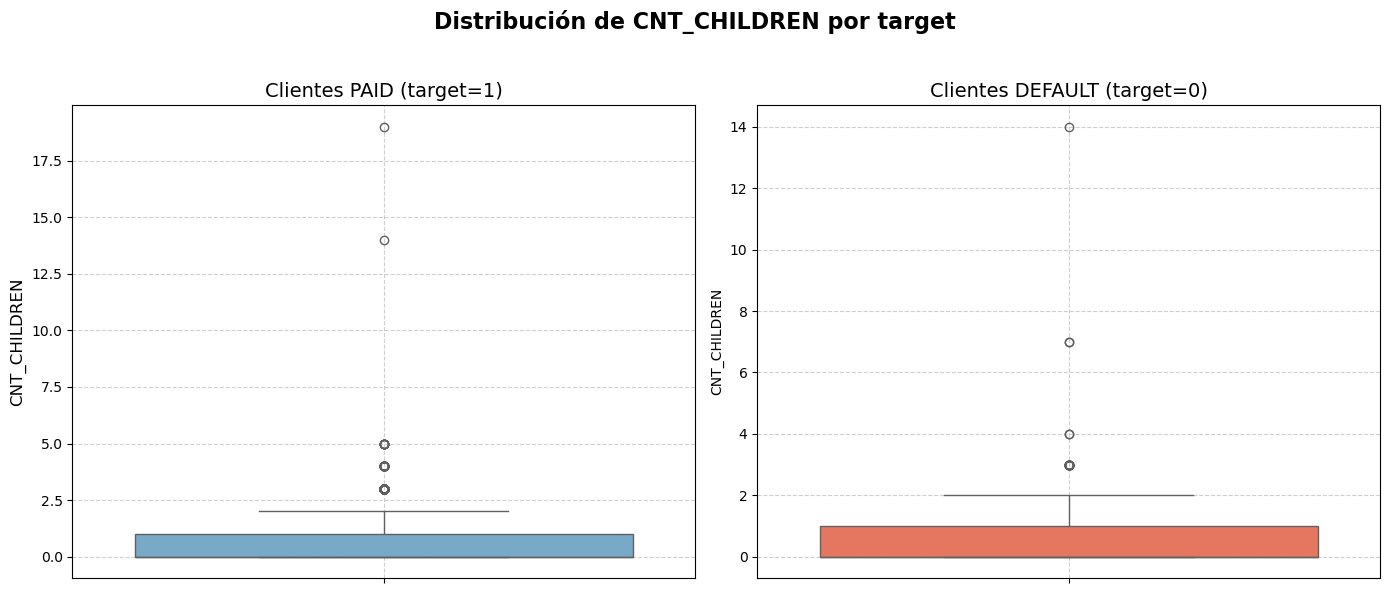

In [22]:
plot_boxplot_by_target(df, 'CNT_CHILDREN')

#### AMT_INCOME_TOTAL

In [24]:
df.AMT_INCOME_TOTAL.describe()

count    2.612900e+04
mean     1.868478e+05
std      1.026175e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

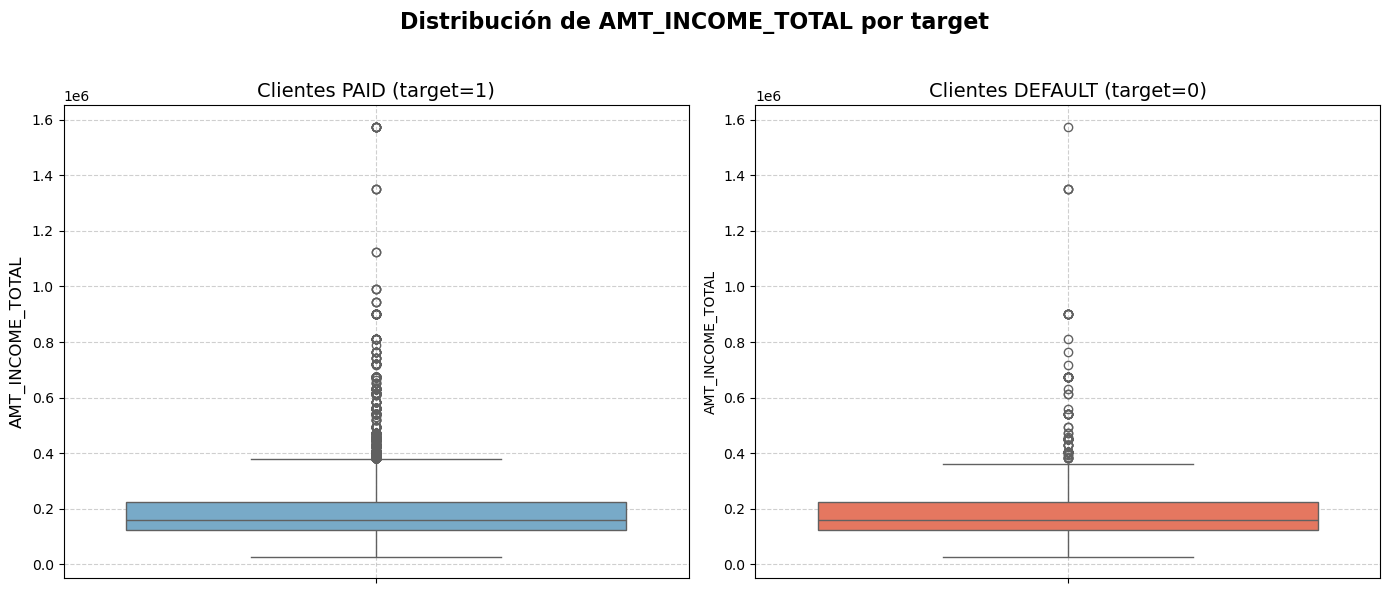

In [25]:
plot_boxplot_by_target(df, 'AMT_INCOME_TOTAL')

#### NAME_INCOME_TYPE

In [26]:
df.NAME_INCOME_TYPE.value_counts(normalize=True)

NAME_INCOME_TYPE
Working                 0.519193
Commercial associate    0.233955
Pensioner               0.166405
State servant           0.080141
Student                 0.000306
Name: proportion, dtype: float64

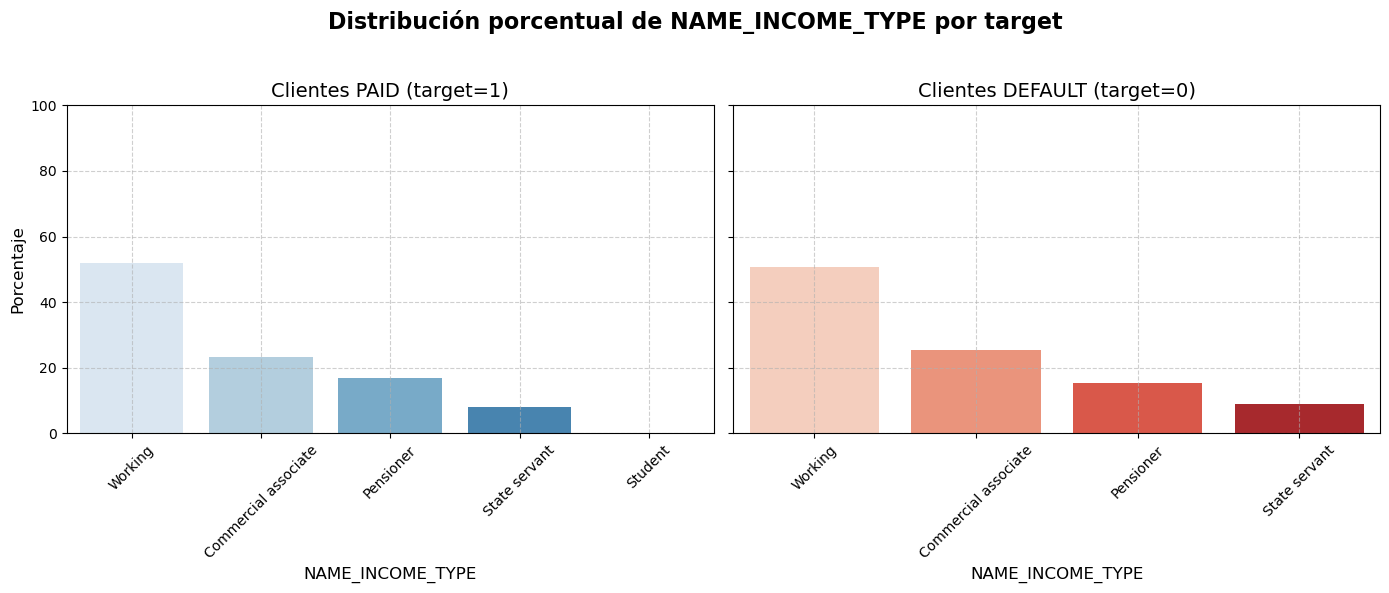

In [38]:
plot_categorical_by_target(df, 'NAME_INCOME_TYPE')

#### NAME_EDUCATION_TYPE

In [28]:
#NAME_EDUCATION_TYPE
df.NAME_EDUCATION_TYPE.value_counts(normalize=True)

NAME_EDUCATION_TYPE
Secondary / secondary special    0.683034
Higher education                 0.264955
Incomplete higher                0.040185
Lower secondary                  0.010869
Academic degree                  0.000957
Name: proportion, dtype: float64

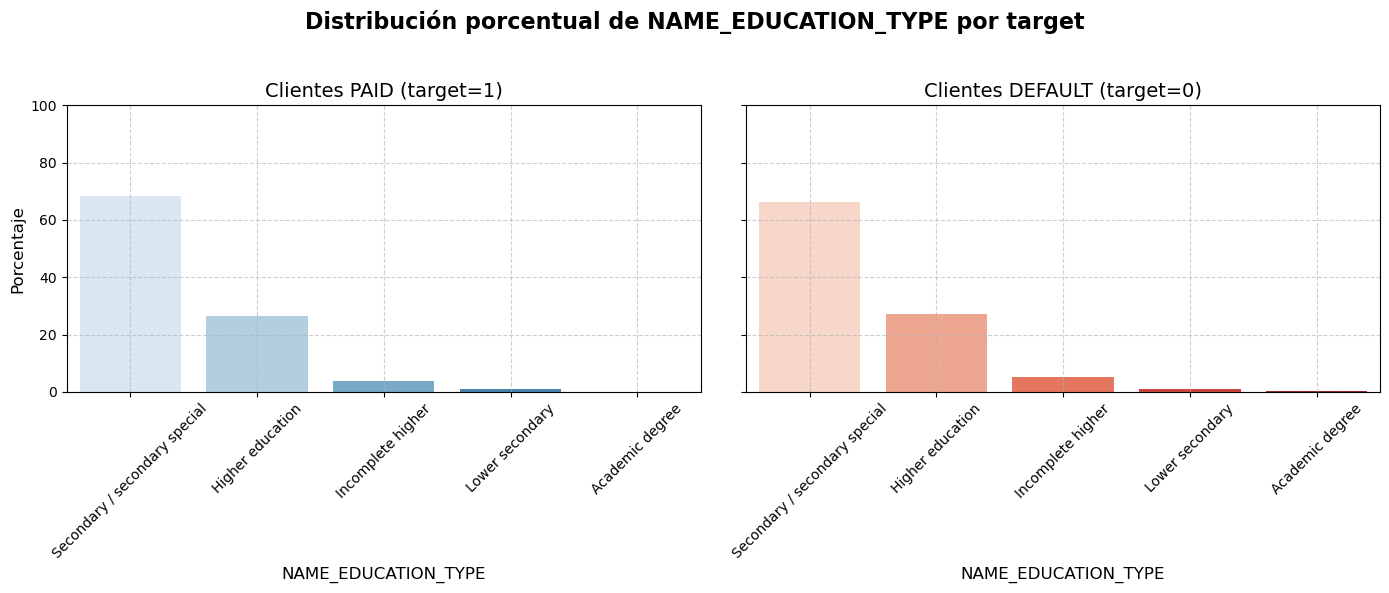

In [39]:
plot_categorical_by_target(df, 'NAME_EDUCATION_TYPE')

#### NAME_FAMILY_STATUS 

In [31]:
#NAME_FAMILY_STATUS 
df.NAME_FAMILY_STATUS.value_counts(normalize=True)

NAME_FAMILY_STATUS
Married                 0.691454
Single / not married    0.132075
Civil marriage          0.078954
Separated               0.057140
Widow                   0.040377
Name: proportion, dtype: float64

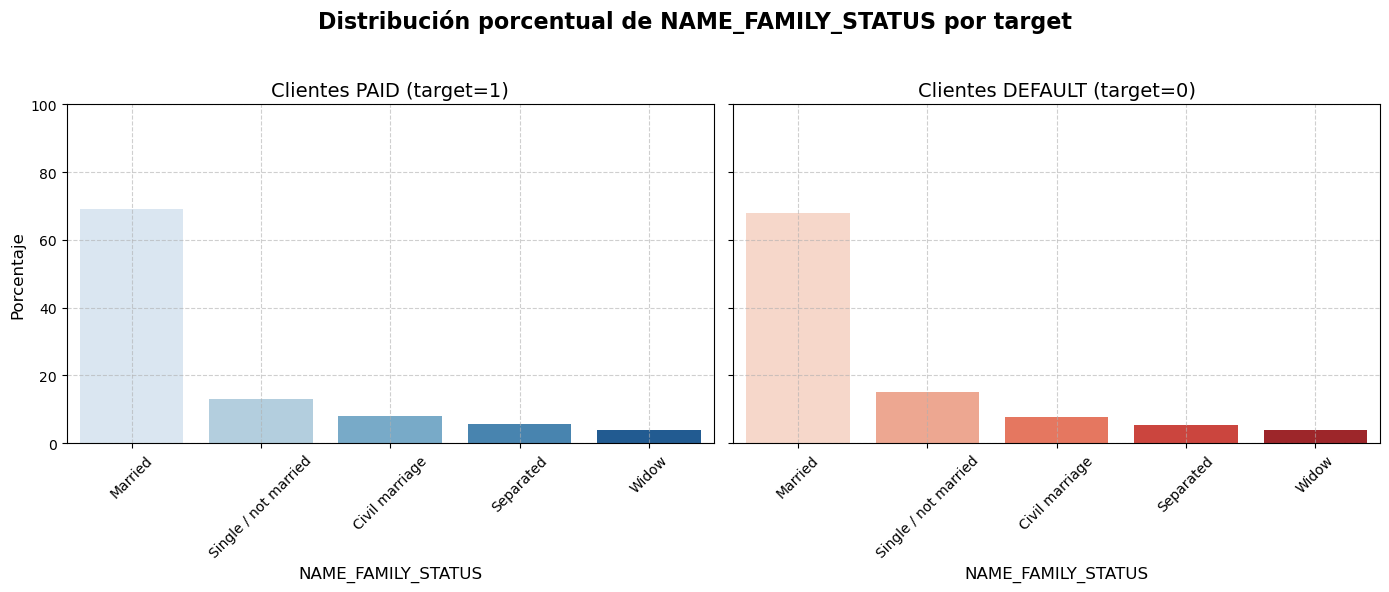

In [40]:
plot_categorical_by_target(df, 'NAME_FAMILY_STATUS')

#### NAME_HOUSING_TYPE

In [33]:
#NAME_HOUSING_TYPE
df.NAME_HOUSING_TYPE.value_counts(normalize=True)

NAME_HOUSING_TYPE
House / apartment      0.892610
With parents           0.050212
Municipal apartment    0.030847
Rented apartment       0.015500
Office apartment       0.007348
Co-op apartment        0.003483
Name: proportion, dtype: float64

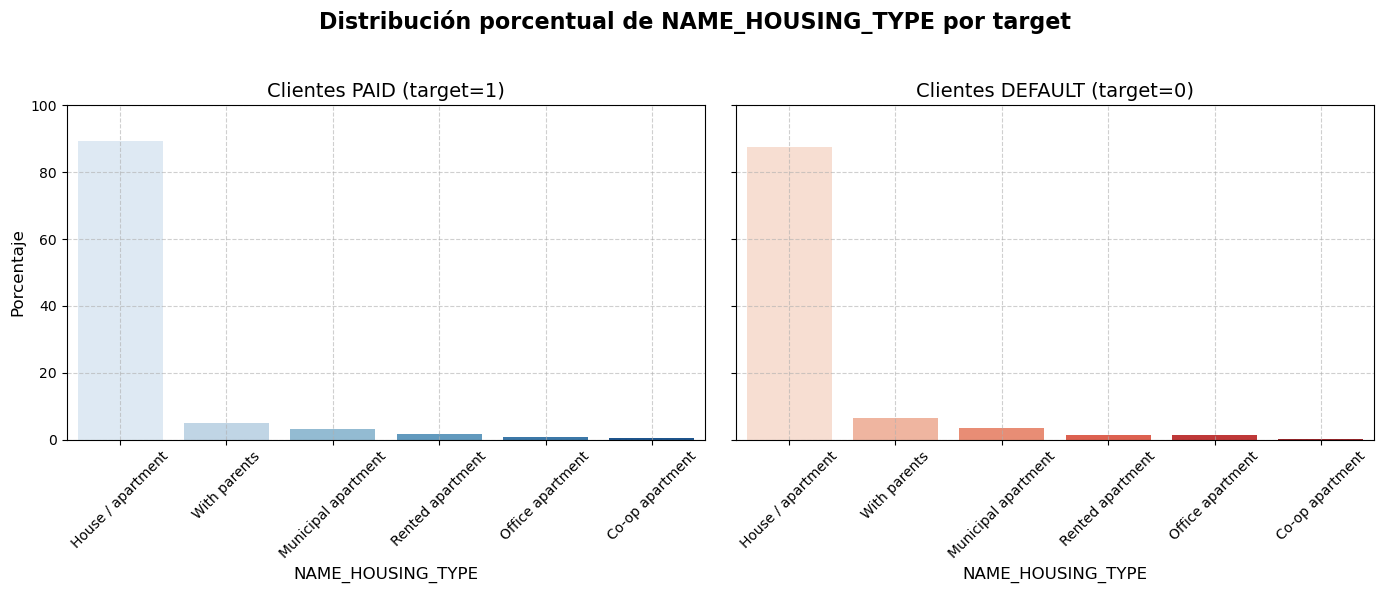

In [41]:
plot_categorical_by_target(df, 'NAME_HOUSING_TYPE')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26129 entries, 0 to 26128
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   26129 non-null  int64  
 1   target               26129 non-null  int64  
 2   CODE_GENDER          26129 non-null  object 
 3   FLAG_OWN_CAR         26129 non-null  object 
 4   FLAG_OWN_REALTY      26129 non-null  object 
 5   CNT_CHILDREN         26129 non-null  int64  
 6   AMT_INCOME_TOTAL     26129 non-null  float64
 7   NAME_INCOME_TYPE     26129 non-null  object 
 8   NAME_EDUCATION_TYPE  26129 non-null  object 
 9   NAME_FAMILY_STATUS   26129 non-null  object 
 10  NAME_HOUSING_TYPE    26129 non-null  object 
 11  DAYS_BIRTH           26129 non-null  int64  
 12  DAYS_EMPLOYED        26129 non-null  int64  
 13  FLAG_MOBIL           26129 non-null  int64  
 14  FLAG_WORK_PHONE      26129 non-null  int64  
 15  FLAG_PHONE           26129 non-null 

#### DAYS_EMPLOYED

In [45]:
df.DAYS_EMPLOYED.describe()

count     26129.000000
mean      58338.640400
std      136839.261401
min      -15713.000000
25%       -3153.000000
50%       -1577.000000
75%        -425.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

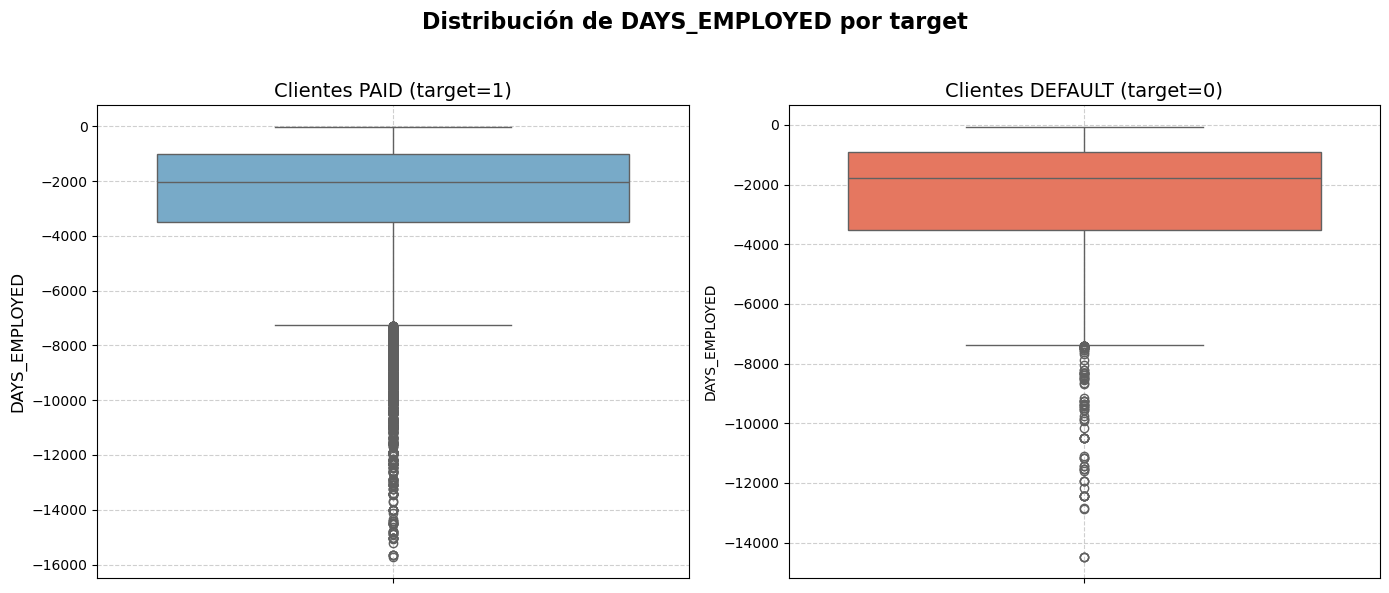

In [47]:
plot_boxplot_by_target(df.loc[df.DAYS_EMPLOYED<2000,:], 'DAYS_EMPLOYED')

#### FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL

In [48]:
df.FLAG_MOBIL.value_counts(normalize=True)

FLAG_MOBIL
1    1.0
Name: proportion, dtype: float64

In [49]:
df.FLAG_WORK_PHONE.value_counts(normalize=True)

FLAG_WORK_PHONE
0    0.773968
1    0.226032
Name: proportion, dtype: float64

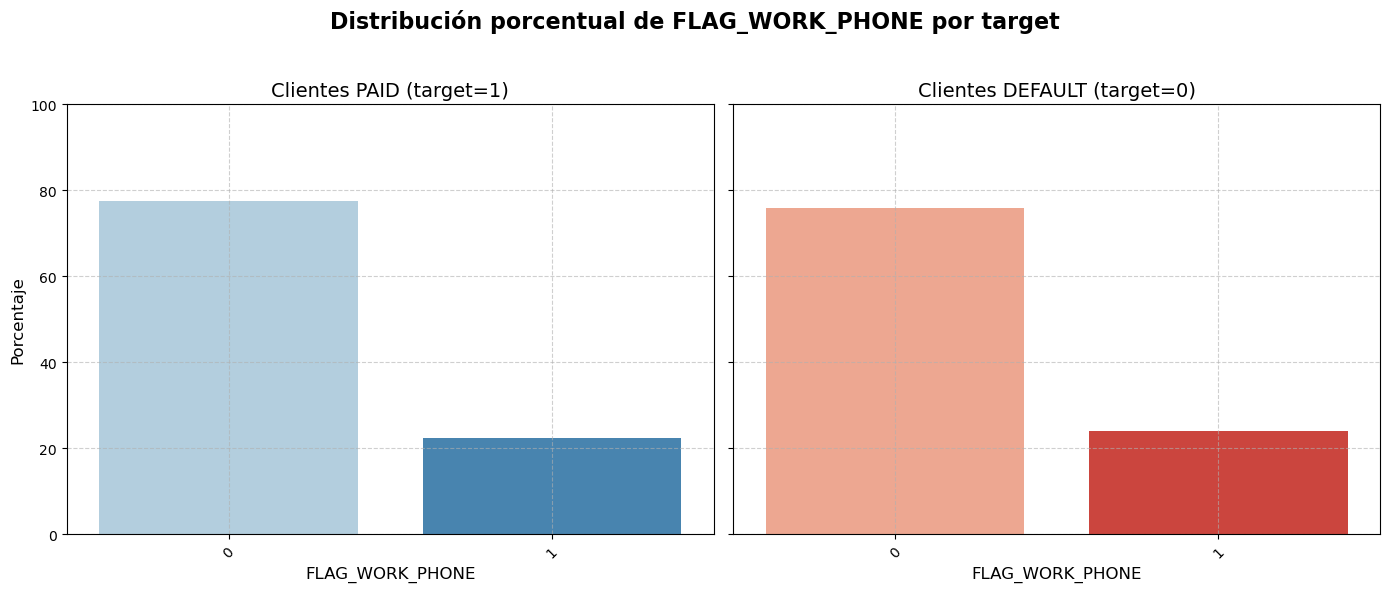

In [50]:
plot_categorical_by_target(df, 'FLAG_WORK_PHONE')

In [51]:
df.FLAG_PHONE.value_counts(normalize=True)

FLAG_PHONE
0    0.709977
1    0.290023
Name: proportion, dtype: float64

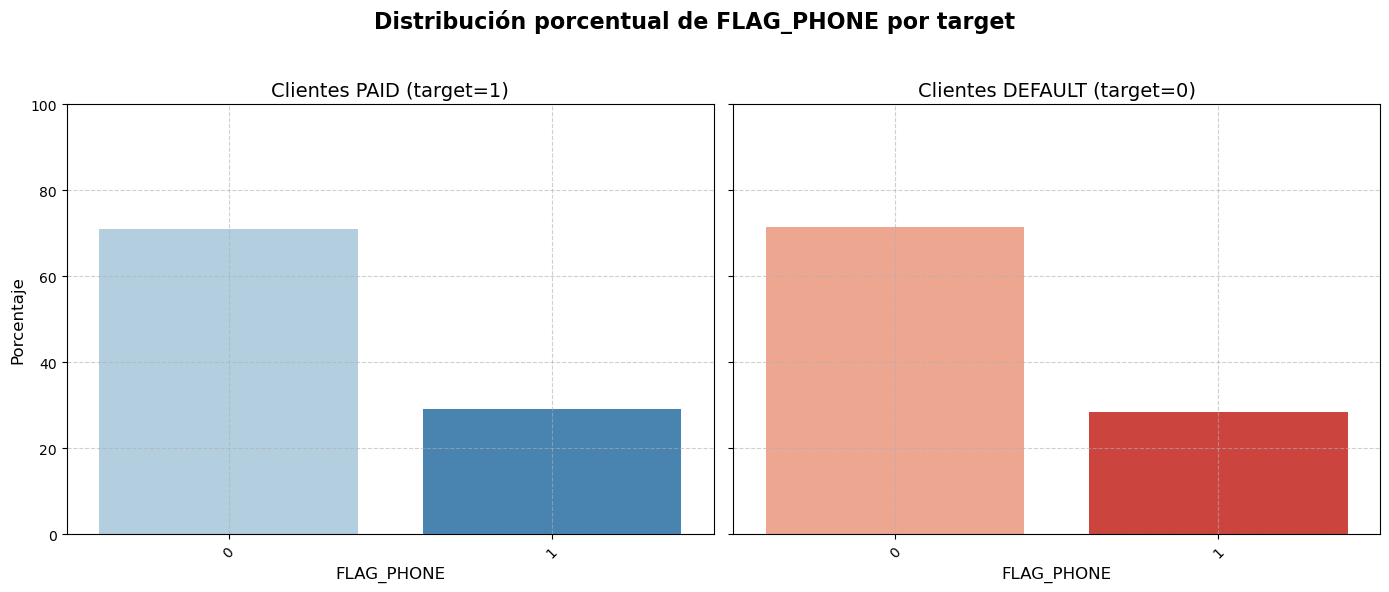

In [52]:
plot_categorical_by_target(df, 'FLAG_PHONE')

In [53]:
df.FLAG_EMAIL.value_counts(normalize=True)

FLAG_EMAIL
0    0.907459
1    0.092541
Name: proportion, dtype: float64

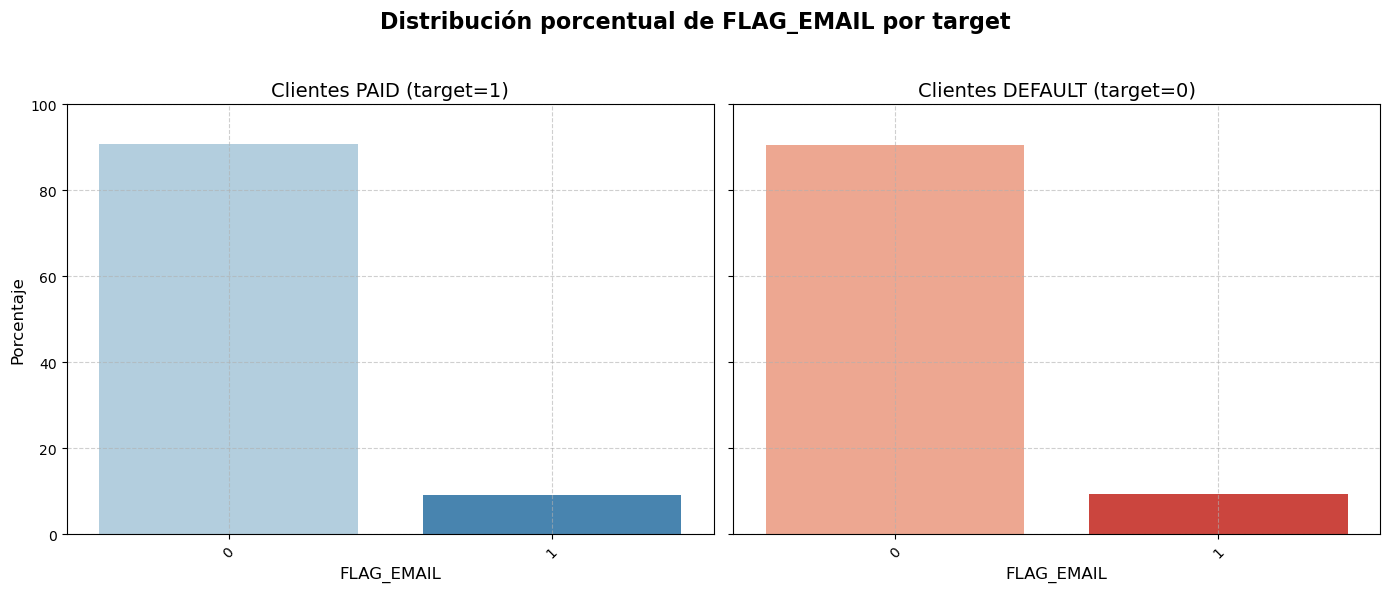

In [54]:
plot_categorical_by_target(df, 'FLAG_EMAIL')

#### OCCUPATION_TYPE

In [55]:
#OCCUPATION_TYPE
df.OCCUPATION_TYPE.value_counts(normalize=True)

OCCUPATION_TYPE
Laborers                 0.244389
Core staff               0.141590
Sales staff              0.139762
Managers                 0.121862
Drivers                  0.085453
High skill tech staff    0.055085
Medicine staff           0.050152
Accountants              0.047492
Cooking staff            0.025769
Security staff           0.024605
Cleaning staff           0.022111
Private service staff    0.012690
Low-skill Laborers       0.006983
Secretaries              0.006262
Waiters/barmen staff     0.005597
HR staff                 0.004101
Realty agents            0.003436
IT staff                 0.002660
Name: proportion, dtype: float64

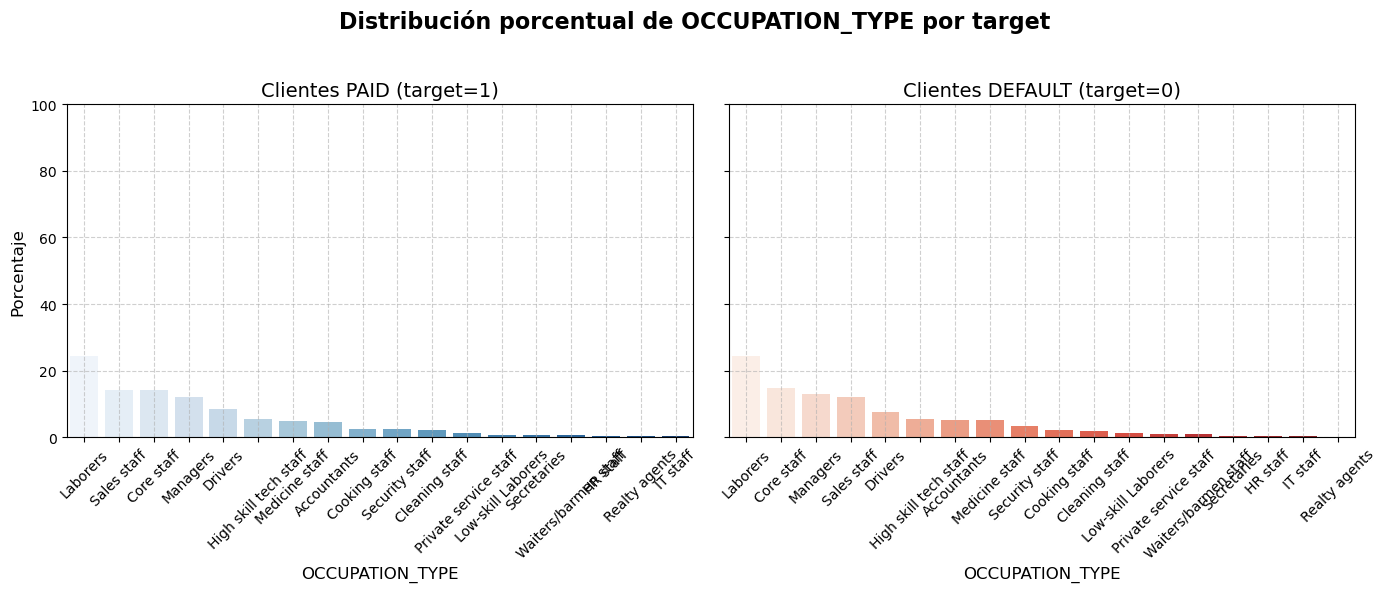

In [56]:
plot_categorical_by_target(df, 'OCCUPATION_TYPE')

#### CNT_FAM_MEMBERS

In [57]:
df.CNT_FAM_MEMBERS.describe()

count    26129.000000
mean         2.206399
std          0.915896
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

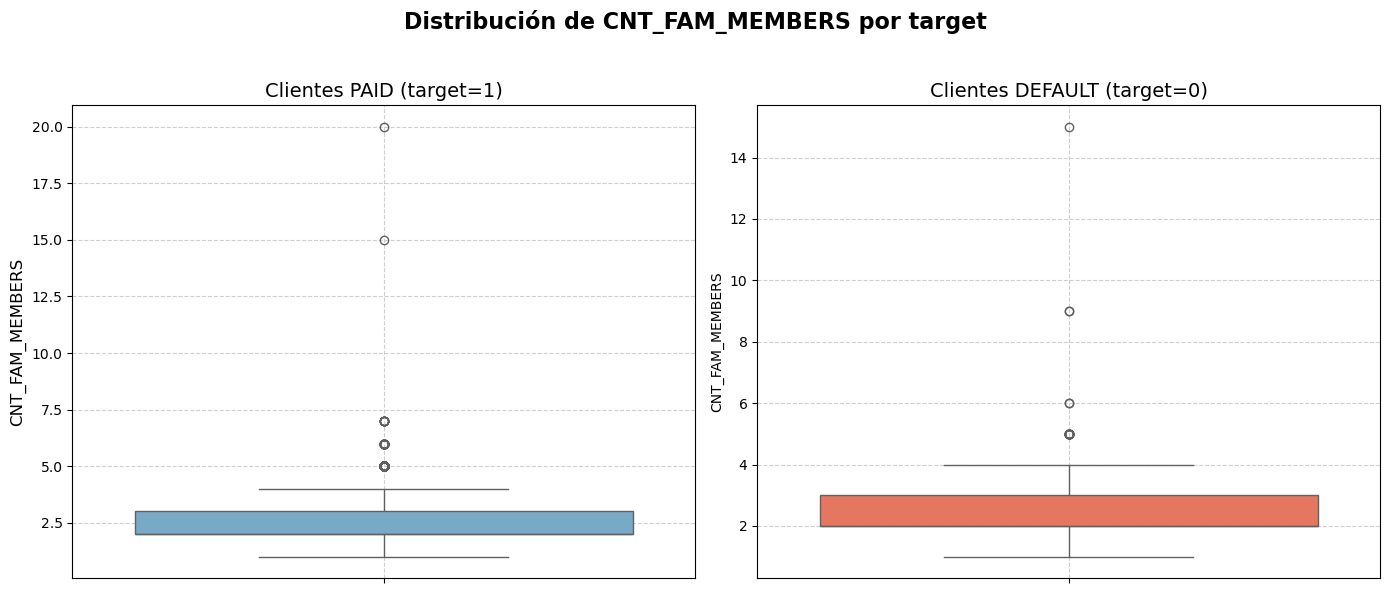

In [61]:
plot_boxplot_by_target(df, 'CNT_FAM_MEMBERS')

### Proccess data

In [77]:
df = pd.read_csv('data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26129 entries, 0 to 26128
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   26129 non-null  int64  
 1   target               26129 non-null  int64  
 2   CODE_GENDER          26129 non-null  object 
 3   FLAG_OWN_CAR         26129 non-null  object 
 4   FLAG_OWN_REALTY      26129 non-null  object 
 5   CNT_CHILDREN         26129 non-null  int64  
 6   AMT_INCOME_TOTAL     26129 non-null  float64
 7   NAME_INCOME_TYPE     26129 non-null  object 
 8   NAME_EDUCATION_TYPE  26129 non-null  object 
 9   NAME_FAMILY_STATUS   26129 non-null  object 
 10  NAME_HOUSING_TYPE    26129 non-null  object 
 11  DAYS_BIRTH           26129 non-null  int64  
 12  DAYS_EMPLOYED        26129 non-null  int64  
 13  FLAG_MOBIL           26129 non-null  int64  
 14  FLAG_WORK_PHONE      26129 non-null  int64  
 15  FLAG_PHONE           26129 non-null 

In [78]:
df = df.drop(columns=['FLAG_MOBIL', 'DAYS_BIRTH'])
df = df.set_index('ID')

In [73]:
def process_dataframe(df):
    
    # CODE_GENDER: M ==1, F ==0 CATEGORICA
    df['CODE_GENDER'] = df['CODE_GENDER'].map({'M': 1, 'F': 0}).astype('category')

    # FLAG_OWN_CAR: Y ==1, N==0 CATEGORICA
    df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0}).astype('category')

    # FLAG_OWN_REALTY: Y ==1, N ==0 CATEGORICA
    df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0}).astype('category')

    # CNT_CHILDREN: INTEGER
    df['CNT_CHILDREN'] = df['CNT_CHILDREN'].astype('int')

    # AMT_INCOME_TOTAL: INTEGER
    df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].astype('int')

    # NAME_INCOME_TYPE: Working==1, Commercial associate==2, Pensioner==3, State servant==4, Student==5 CATEGORICA
    income_type_map = {
        'Working': 1, 
        'Commercial associate': 2, 
        'Pensioner': 3, 
        'State servant': 4, 
        'Student': 5
    }
    df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].map(income_type_map).astype('category')

    # NAME_EDUCATION_TYPE: Secondary / secondary special==1, Higher education==2, Incomplete higher==3, Lower secondary==4, Academic degree==5 CATEGORICA
    education_type_map = {
        'Secondary / secondary special': 1, 
        'Higher education': 2, 
        'Incomplete higher': 3, 
        'Lower secondary': 4, 
        'Academic degree': 5
    }
    df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map(education_type_map).astype('category')

    # NAME_FAMILY_STATUS: Married==1, Single / not married==2, Civil marriage==3, Separated==4, Widow ==5 CATEGORICA
    family_status_map = {
        'Married': 1, 
        'Single / not married': 2, 
        'Civil marriage': 3, 
        'Separated': 4, 
        'Widow': 5
    }
    df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].map(family_status_map).astype('category')

    # NAME_HOUSING_TYPE; House / apartment ==1, With parents ==2, Municipal apartment== 3, Rented apartment==4, Office apartment OR Co-op apartment ==5 CATEGORICA
    housing_type_map = {
        'House / apartment': 1, 
        'With parents': 2, 
        'Municipal apartment': 3, 
        'Rented apartment': 4, 
        'Office apartment': 5, 
        'Co-op apartment': 5
    }
    df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].map(housing_type_map).astype('category')

    # DAYS_EMPLOYED: INTEGER
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].astype('int')

    # FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL: CATEGORICA 
    df['FLAG_WORK_PHONE'] = df['FLAG_WORK_PHONE'].astype('category')
    df['FLAG_PHONE'] = df['FLAG_PHONE'].astype('category')
    df['FLAG_EMAIL'] = df['FLAG_EMAIL'].astype('category')

    # OCCUPATION_TYPE: Categorización de ocupaciones
    occupation_type_map = {
        'Laborers': 1,
        'Core staff': 2,
        'Sales staff': 3,
        'Managers': 4,
        'Drivers': 5,
        'High skill tech staff': 6,
        'Medicine staff': 7,
        'Accountants': 8,
        'Cooking staff': 9,
        'Security staff': 10,
        'Cleaning staff': 11,
        'Private service staff': 12,
        np.nan: 13  # NaN o nulos == 13
    }
    # Asignar todos los valores restantes a 14
    df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].map(occupation_type_map).fillna(14).astype('category')

    # CNT_FAM_MEMBERS: INTEGER
    df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype('int')

    return df

In [79]:
df_procesado = process_dataframe(df)
df_procesado.head(20)

,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,
5008804,0,1,1,1,0,427500,1,2,3,4,-4542,1,0,0,13.0,2
5008805,0,1,1,1,0,427500,1,2,3,4,-4542,1,0,0,13.0,2
5008812,1,0,0,1,0,283500,3,2,4,1,365243,0,0,0,13.0,1
5008813,1,0,0,1,0,283500,3,2,4,1,365243,0,0,0,13.0,1
5008814,1,0,0,1,0,283500,3,2,4,1,365243,0,0,0,13.0,1
5008815,1,1,1,1,0,270000,1,2,1,1,-769,1,1,1,8.0,2
5008821,1,1,1,1,0,135000,2,1,1,1,-1194,0,0,0,1.0,2
5008823,1,1,1,1,0,135000,2,1,1,1,-1194,0,0,0,1.0,2
5008824,1,1,1,1,0,135000,2,1,1,1,-1194,0,0,0,1.0,2


In [80]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26129 entries, 5008804 to 5150487
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   target               26129 non-null  int64   
 1   CODE_GENDER          26129 non-null  category
 2   FLAG_OWN_CAR         26129 non-null  category
 3   FLAG_OWN_REALTY      26129 non-null  category
 4   CNT_CHILDREN         26129 non-null  int64   
 5   AMT_INCOME_TOTAL     26129 non-null  int64   
 6   NAME_INCOME_TYPE     26129 non-null  category
 7   NAME_EDUCATION_TYPE  26129 non-null  category
 8   NAME_FAMILY_STATUS   26129 non-null  category
 9   NAME_HOUSING_TYPE    26129 non-null  category
 10  DAYS_EMPLOYED        26129 non-null  int64   
 11  FLAG_WORK_PHONE      26129 non-null  category
 12  FLAG_PHONE           26129 non-null  category
 13  FLAG_EMAIL           26129 non-null  category
 14  OCCUPATION_TYPE      26129 non-null  category
 15  CNT_FAM_MEMBERS 

In [84]:
df_train, df_test = train_test_split(df_procesado, test_size=0.2, stratify=df['target'], random_state=35)

print(f'Tamaño del train: {df_train.shape}')
print(f'Tamaño del test: {df_test.shape}')


Tamaño del train: (20903, 16)
Tamaño del test: (5226, 16)


In [85]:
df_procesado.to_parquet('data/data_cleaned.parquet')

In [87]:
df_loaded = pd.read_parquet('data/data_cleaned.parquet')
categorical_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 
                       'OCCUPATION_TYPE']


df_loaded[categorical_columns] = df_loaded[categorical_columns].astype('category')
df_loaded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26129 entries, 5008804 to 5150487
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   target               26129 non-null  int64   
 1   CODE_GENDER          26129 non-null  category
 2   FLAG_OWN_CAR         26129 non-null  category
 3   FLAG_OWN_REALTY      26129 non-null  category
 4   CNT_CHILDREN         26129 non-null  int64   
 5   AMT_INCOME_TOTAL     26129 non-null  int64   
 6   NAME_INCOME_TYPE     26129 non-null  category
 7   NAME_EDUCATION_TYPE  26129 non-null  category
 8   NAME_FAMILY_STATUS   26129 non-null  category
 9   NAME_HOUSING_TYPE    26129 non-null  category
 10  DAYS_EMPLOYED        26129 non-null  int64   
 11  FLAG_WORK_PHONE      26129 non-null  category
 12  FLAG_PHONE           26129 non-null  category
 13  FLAG_EMAIL           26129 non-null  category
 14  OCCUPATION_TYPE      26129 non-null  category
 15  CNT_FAM_MEMBERS 

In [89]:
df_train.to_parquet('data/data_train.parquet')
df_test.to_parquet('data/data_test.parquet')